In [1]:
import librosa
import librosa.display
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
firstlovepiano_file = "E:\Dropbox\WMP\Piano\First Love (duet) - piano.mp3"
butterfly_file = "E:\Dropbox\WMP\Japanese\Wait For You - 4D Feat 8utterfly.mp3"
callmesick_file = "E:\Dropbox\WMP\Japanese\Call Me Sick - Rei (Reina - E-girls) on THE FIRST TAKE.mp3"

firstlovepiano,sr = librosa.load(firstlovepiano_file)
butterfly, _ = librosa.load(butterfly_file)
callmesick, _ = librosa.load(callmesick_file)

C:\Users\Brandon\miniconda3\envs\tensorflowenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
C:\Users\Brandon\miniconda3\envs\tensorflowenv\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


# Extract RMSE with Librosa

In [5]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

firstlovepiano_rms = librosa.feature.rms(firstlovepiano,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
butterfly_rms = librosa.feature.rms(butterfly,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
callmesick_rms = librosa.feature.rms(callmesick,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)

RMS_vals = [firstlovepiano_rms,butterfly_rms,callmesick_rms]

In [4]:
firstlovepiano_rms.shape

(1, 12209)

The RMS shape is the same as what we computed earlier for AE
- This is because we are using the frame_length and hop_length (and same files of course)

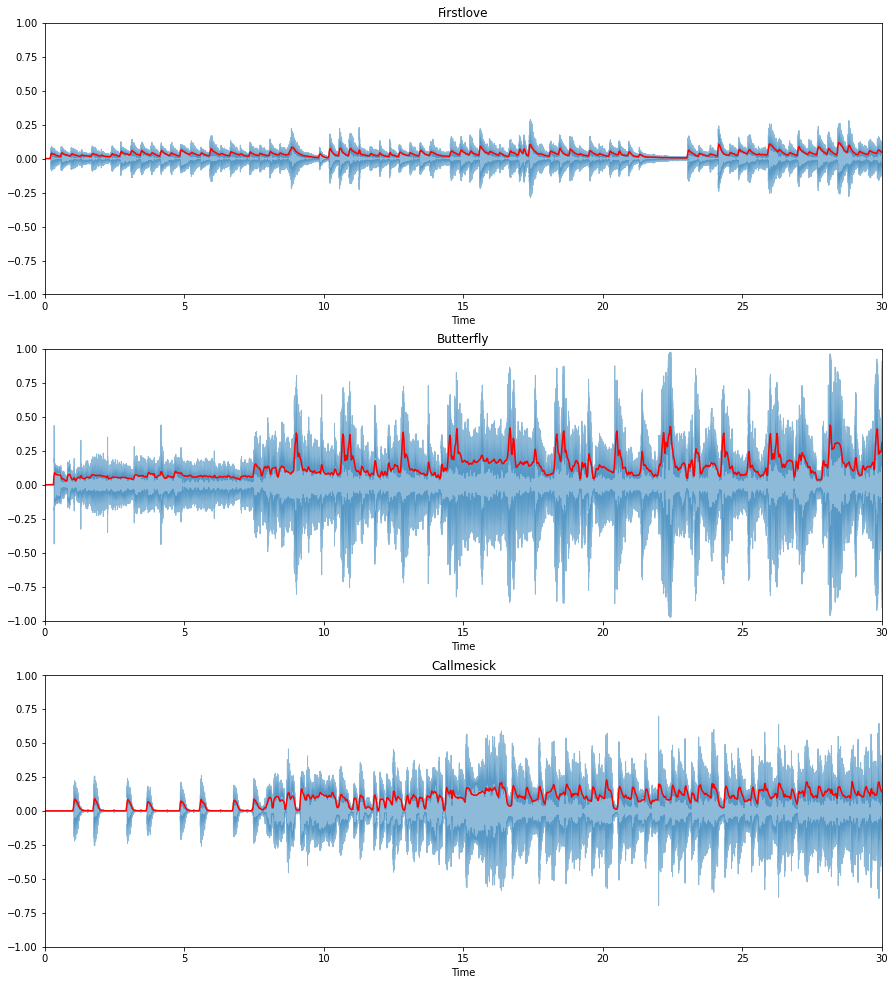

In [38]:
plt.figure(figsize = (15,17))

#Compute time for frames
song_names = ["Firstlove","Butterfly","Callmesick"]
songs = [firstlovepiano,butterfly,callmesick]
times = []
for i in RMS_vals:
    frames = range(0,len(i[0]))
    times.append(librosa.frames_to_time(frames,hop_length=HOP_LENGTH))

for i,song in enumerate(songs):
    plt.subplot(3,1,i+1)
    librosa.display.waveplot(song,alpha=0.5)
    plt.plot(times[i],RMS_vals[i][0],color='r')
    plt.title(song_names[i])
    plt.ylim((-1,1))
    plt.xlim((0,30)) #First 30 seconds only

# Computing RMS manually 
for learning purposes

$$ RMS_{t} = \sqrt{\frac{1}{K_{tot}}*\sum_{k=tK_{tot}}^{(t+1)K_{tot}-1}s(k)^{2}}$$

In english:
- $s(k)^{2}$ is the amplitude$^{2}$
- You are taking the sum of all squared sample amplitudes in the current frame
- Dividing by the total number of frames to normalize the results
- Finally taking the sqrt

In [85]:
def rmse(signal,frame_length,hop_length):
    rmse = []
    K = len(signal)/frame_length #Total number of frames
    for i in range(0,len(signal),hop_length): #Iterate from 0 to len(signal) by increments of the hop_length
        rmse.append(np.sqrt(np.sum(signal[i:i+frame_length]**2/frame_length)))
    return np.array(rmse)

In [86]:
manual_rmse_firstlovepiano = rmse(firstlovepiano,FRAME_LENGTH,HOP_LENGTH)
manual_rmse_butterfly = rmse(butterfly,FRAME_LENGTH,HOP_LENGTH)
manual_rmse_callmesick = rmse(callmesick,FRAME_LENGTH,HOP_LENGTH)

manual_rmse = [manual_rmse_firstlovepiano,manual_rmse_butterfly,manual_rmse_callmesick]

len(manual_rmse_firstlovepiano)

12209

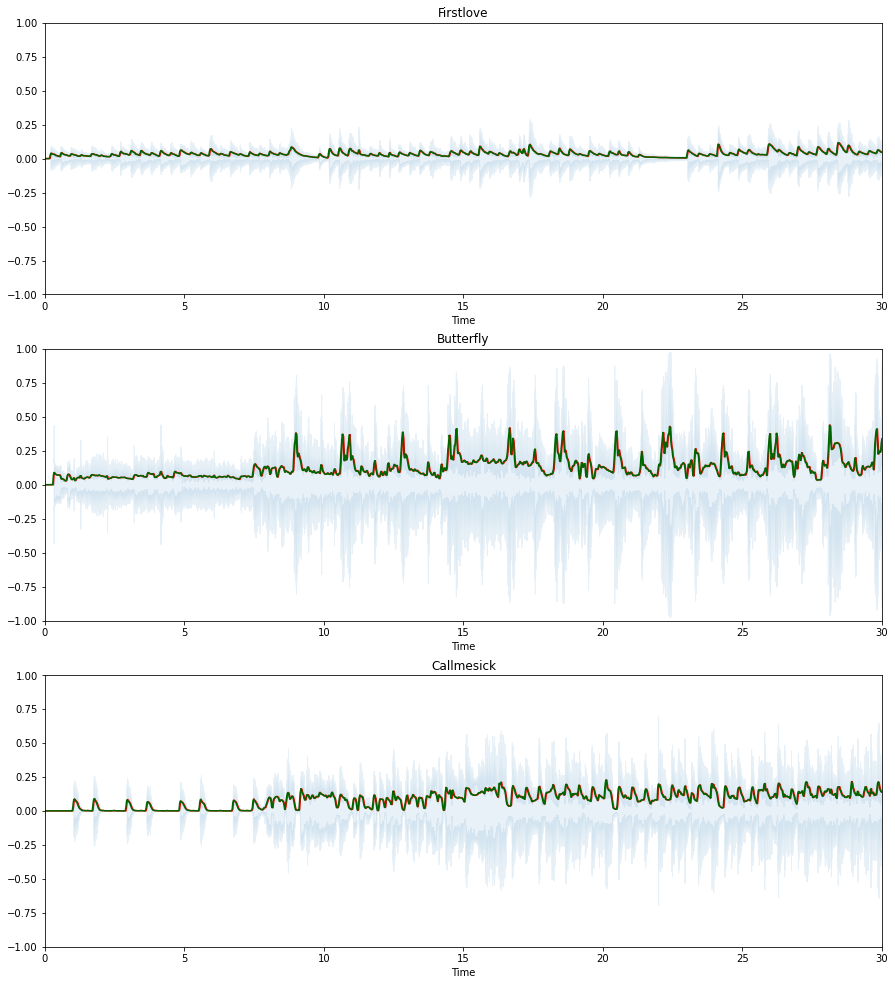

In [87]:
plt.figure(figsize = (15,17))

for i,song in enumerate(songs):
    plt.subplot(3,1,i+1)
    librosa.display.waveplot(song,alpha=0.1)
    plt.plot(times[i],RMS_vals[i][0],color='r')
    plt.plot(times[i],manual_rmse[i],color='darkgreen')
    plt.title(song_names[i])
    plt.ylim((-1,1))
    plt.xlim((0,30)) #First 30 seconds only

# Zero-crossing Rate

In [102]:
firstlovepiano_zcr = librosa.feature.zero_crossing_rate(firstlovepiano,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
butterfly_zcr = librosa.feature.zero_crossing_rate(butterfly,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
callmesick_zcr = librosa.feature.zero_crossing_rate(callmesick,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)

ZCR_vals = [firstlovepiano_zcr,butterfly_zcr,callmesick_zcr]

print(ZCR_vals[0].shape) #Again having that (1,12209) instead of (,12209) shape ... fix with below line

ZCR_vals = [np.array(i[0]) for i in ZCR_vals]

(1, 12209)


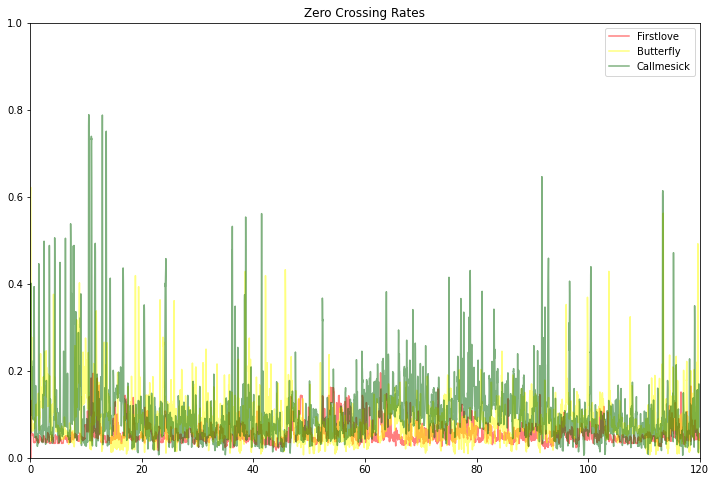

In [123]:
plt.figure(figsize = (12,8))
colors=['r','yellow','darkgreen']

for i,zcr in enumerate(ZCR_vals):
    plt.plot(times[i],zcr,color=colors[i],label=song_names[i],alpha=0.5)
    plt.title("Zero Crossing Rates")
    plt.legend()
    plt.ylim((0,1))
    plt.xlim((0,120)) #First 2min only
    
#Note: These are normalized ZCR values. Nonnormalized would be ZCR = librosa.feature.zero_crossing_rate(sample*frame_length)

Rock music with heavy percussion will tend to have a higher ZCR (snare/crash sounds do a very sharp + to - spike)

Normal speaking also has high ZCR in comparison to white-noise

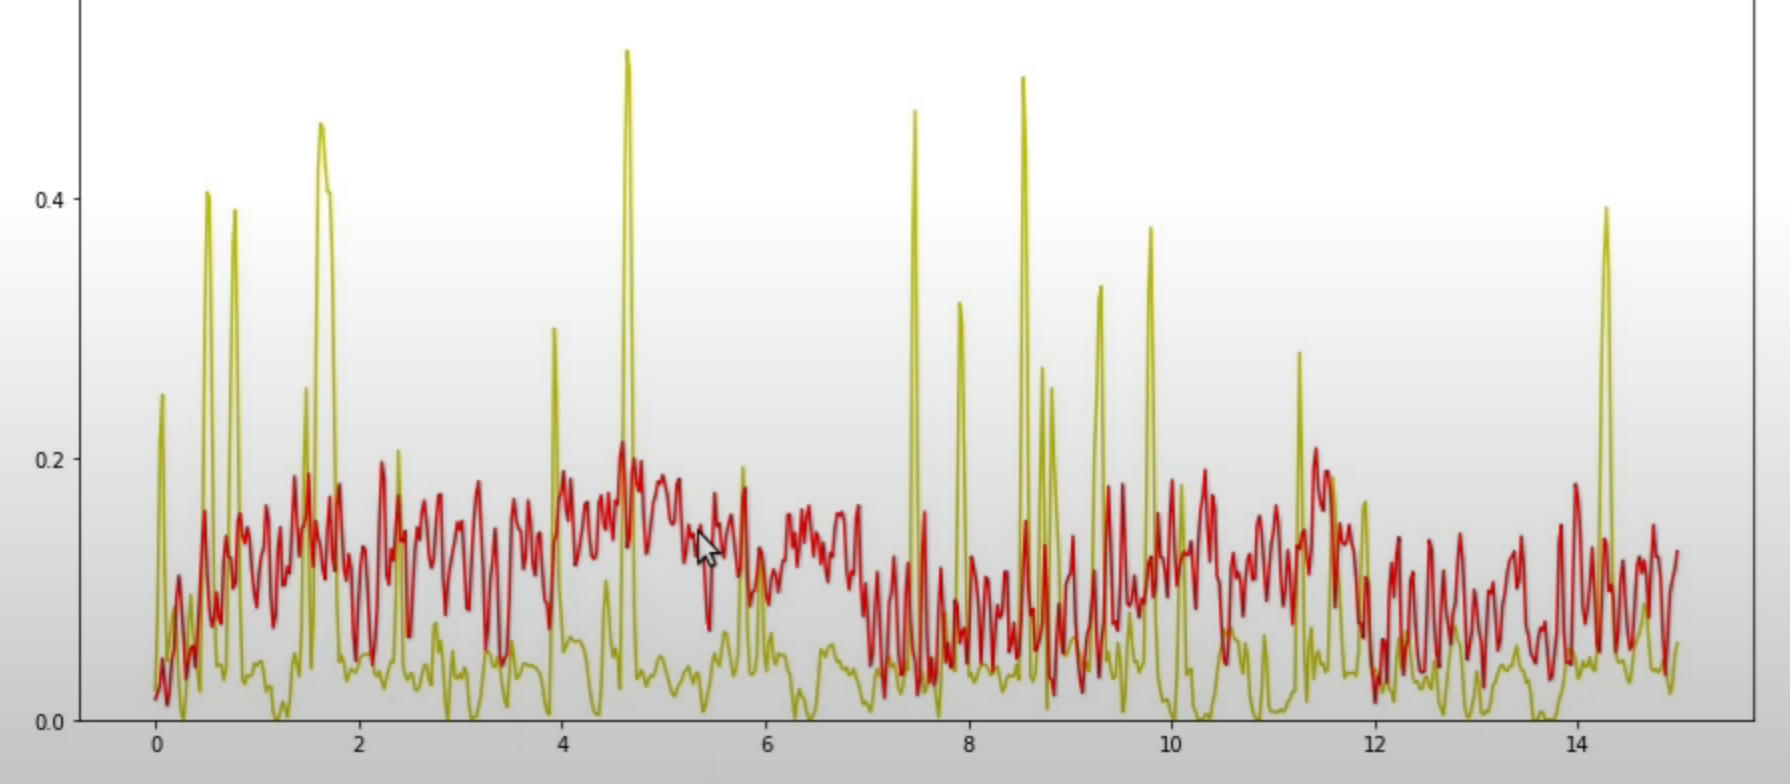

In [124]:
display.Image("ZCR_noise_vs_talking.png")

In the above image
> <font color='yellow'>yellow</font> is human speaking <br>
> <font color='red'>red</font> is white noise

We observe that human speaking is very pop-y while white noise is consistent and having a higher average ZCR